In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
import IPython.display
from sklearn.multiclass import OneVsRestClassifier
from nltk.stem import PorterStemmer

import joblib
import warnings
from skmultilearn.model_selection import iterative_train_test_split
warnings.filterwarnings('ignore')




# Prepare Dataset

In [58]:
products = pd.read_json('../data/products.json') 
categories = pd.read_json('../data/categories.json') 

In [59]:
df = products[['name','category','description']]

In [60]:
df['Text'] = df.name + ' ' + df.description

# Transform Dataset

In [67]:

# Transformo las categorias de tipo JSON a lista

# Itero sobre las categorias 
for index,categ in enumerate(df.category.tolist()):

    ListCategories = [] 

    # Itero sobre cada categoria de cada producto
    for i in categ:

        # Agrego cada categoria producto a producto
        ListCategories.append(i['name'])

    # Piso la columna categoria con las categorias en forma de lista
    df.category[index] = ListCategories

In [72]:
database = df[['Text','category']]

In [69]:
database['category'] = database['category'].astype('[', '')

In [37]:
database.category =  database.category.astype(str)
database.Text =  database.Text.apply(str)

In [51]:
database.category.to_string

<bound method Series.to_string of 0        ['Connected Home & Housewares', 'Housewares', ...
1        ['Connected Home & Housewares', 'Housewares', ...
2        ['Connected Home & Housewares', 'Housewares', ...
3        ['Connected Home & Housewares', 'Housewares', ...
4        ['Connected Home & Housewares', 'Housewares', ...
                               ...                        
51641    ['Appliances', 'Appliance Parts & Accessories'...
51642    ['Appliances', 'Appliance Parts & Accessories'...
51643    ['Computers & Tablets', 'Computer Accessories ...
51644    ['TV & Home Theater', 'Streaming Media Players...
51645    ['Appliances', 'Small Kitchen Appliances', 'To...
Name: category, Length: 51646, dtype: object>

In [73]:
database

,Text,category
0,Duracell - AAA Batteries (4-Pack) Compatible w...,"[Connected Home & Housewares, Housewares, Hous..."
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack...,"[Connected Home & Housewares, Housewares, Hous..."
2,Duracell - AA Batteries (8-Pack) Compatible wi...,"[Connected Home & Housewares, Housewares, Hous..."
3,Energizer - MAX Batteries AA (4-Pack) 4-pack A...,"[Connected Home & Housewares, Housewares, Hous..."
4,Duracell - C Batteries (4-Pack) Compatible wit...,"[Connected Home & Housewares, Housewares, Hous..."
...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[Appliances, Appliance Parts & Accessories, Ai..."
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[Appliances, Appliance Parts & Accessories, Va..."
51643,Aleratec - Drive Enclosure - Internal - Black ...,"[Computers & Tablets, Computer Accessories & P..."
51644,Amazon - Fire TV Stick Streams 1080p content; ...,"[TV & Home Theater, Streaming Media Players, R..."


In [62]:
database.to_csv('database.csv')

In [82]:
# Nombre de las columnas, en este caso opte por tomas todas las categorias de todos los productos
NameColumns = ['cat0' , 'cat1' , 'cat2', 'cat3', 'cat4', 'cat5','cat6']

# Creo un dataframe con las categorias de cada producto
CategoriesProducts = pd.DataFrame(df.category.tolist())

# Cambio el nombre de la columna 
CategoriesProducts.columns = NameColumns



In [83]:
CategoriesProducts =  CategoriesProducts[['cat0','cat1','cat2']]

In [84]:
CategoriesProducts = CategoriesProducts.fillna('')
CategoriesProducts['allCategory'] = CategoriesProducts[['cat0','cat1','cat2']].apply(','.join, axis=1)

In [88]:
df

,name,category,description,Text
0,Duracell - AAA Batteries (4-Pack),"[Connected Home & Housewares, Housewares, Hous...",Compatible with select electronic devices; AAA...,Duracell - AAA Batteries (4-Pack) Compatible w...
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"[Connected Home & Housewares, Housewares, Hous...",Long-lasting energy; DURALOCK Power Preserve t...,Duracell - AA 1.5V CopperTop Batteries (4-Pack...
2,Duracell - AA Batteries (8-Pack),"[Connected Home & Housewares, Housewares, Hous...",Compatible with select electronic devices; AA ...,Duracell - AA Batteries (8-Pack) Compatible wi...
3,Energizer - MAX Batteries AA (4-Pack),"[Connected Home & Housewares, Housewares, Hous...",4-pack AA alkaline batteries; battery tester i...,Energizer - MAX Batteries AA (4-Pack) 4-pack A...
4,Duracell - C Batteries (4-Pack),"[Connected Home & Housewares, Housewares, Hous...",Compatible with select electronic devices; C s...,Duracell - C Batteries (4-Pack) Compatible wit...
...,...,...,...,...
51641,Honeywell - True HEPA Replacement Filters for ...,"[Appliances, Appliance Parts & Accessories, Ai...",Compatible with select Honeywell air purifier ...,Honeywell - True HEPA Replacement Filters for ...
51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,"[Appliances, Appliance Parts & Accessories, Va...",Removes dirt and grime from hard floors; cloth...,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...
51643,Aleratec - Drive Enclosure - Internal - Black,"[Computers & Tablets, Computer Accessories & P...","1 x Total Bay - 1 x 2.5"" Bay",Aleratec - Drive Enclosure - Internal - Black ...
51644,Amazon - Fire TV Stick,"[TV & Home Theater, Streaming Media Players, R...","Streams 1080p content; dual-band, dual-antenna...",Amazon - Fire TV Stick Streams 1080p content; ...


In [98]:
var = CategoriesProducts.drop(columns=['cat0','cat1','cat2'])

In [116]:
a.drop(columns=['category'])

,text
0,duracell aaa battery pack compatible select el...
1,duracell aa v coppertop battery pack long last...
2,duracell aa battery pack compatible select ele...
3,energizer max battery aa pack pack aa alkaline...
4,duracell c battery pack compatible select elec...
...,...
50956,honeywell true hepa replacement filter select ...
50957,dyson hard floor wipe dyson hard dc vacuum pac...
50958,aleratec drive enclosure internal black x tota...
50959,amazon fire tv stick stream p content dual ban...


In [121]:
database = pd.merge([a.drop(columns=['category']),var])

TypeError: merge() missing 1 required positional argument: 'right'

In [47]:

import mysql.connector
db = mysql.connector.connect(host='localhost',user='db_user',password='root',port=32000) 


In [48]:
mydb = db.cursor()
mydb.execute("select * from proyect.PROYECT;")
myresult = mydb.fetchall()

In [49]:
import pandas as pd

In [92]:
a = pd.DataFrame(myresult)

In [93]:
a.columns = ['text','category']

In [94]:
a.category

0        Connected Home & Housewares,Housewares,Househo...
1        Connected Home & Housewares,Housewares,Househo...
2        Connected Home & Housewares,Housewares,Househo...
3        Connected Home & Housewares,Housewares,Househo...
4        Connected Home & Housewares,Housewares,Househo...
                               ...                        
50956    Appliances,Appliance Parts & Accessories,Air P...
50957    Appliances,Appliance Parts & Accessories,Vacuu...
50958    Computers & Tablets,Computer Accessories & Per...
50959    TV & Home Theater,Streaming Media Players,Remo...
50960         Appliances,Small Kitchen Appliances,Toasters
Name: category, Length: 50961, dtype: object

In [95]:
for c,b in enumerate(a.category):
  a.category[c] =  b.replace(',,','')


In [96]:
for i,e in enumerate(a.category): 
    a.category[i] =  e.split(',')
   

In [ ]:
for i,e in enumerate(a.category):
    print(e)

In [107]:
# Nombre de las columnas, en este caso opte por tomas todas las categorias de todos los productos
NameColumns = ['cat0' , 'cat1' , 'cat2', 'cat3', 'cat4', 'cat5']

# Creo un dataframe con las categorias de cada producto
CategoriesProducts = pd.DataFrame(a.category.tolist())

# Cambio el nombre de la columna 
CategoriesProducts.columns = NameColumns

In [124]:
CategoriesProducts = CategoriesProducts.drop(columns=['cat3','cat4','cat5'])

In [125]:
CategoriesProducts

,cat0,cat1,cat2
0,Connected Home & Housewares,Housewares,Household Batteries
1,Connected Home & Housewares,Housewares,Household Batteries
2,Connected Home & Housewares,Housewares,Household Batteries
3,Connected Home & Housewares,Housewares,Household Batteries
4,Connected Home & Housewares,Housewares,Household Batteries
...,...,...,...
50956,Appliances,Appliance Parts & Accessories,Air Purifier Filters & Parts
50957,Appliances,Appliance Parts & Accessories,Vacuum & Floor Care Accessories
50958,Computers & Tablets,Computer Accessories & Peripherals,Hard Drives & Storage
50959,TV & Home Theater,Streaming Media Players,Remote TV Streaming


In [126]:
for i in CategoriesProducts:
    row = 0
    for category in CategoriesProducts[i]:
        if category!= 0:
         CategoriesProducts.loc[row,category] = 1
         row += 1

CategoriesProducts = CategoriesProducts.fillna(0)

/tmp/ipykernel_6507/2128038063.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CategoriesProducts.loc[row,category] = 1
/tmp/ipykernel_6507/2128038063.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CategoriesProducts.loc[row,category] = 1
/tmp/ipykernel_6507/2128038063.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [129]:
database = pd.concat([a.drop(columns=['category']),CategoriesProducts],axis=1)

In [132]:
database = database.drop(columns=['cat0','cat1','cat2'],axis=1)

In [133]:
database

,text,Connected Home & Housewares,Carfi Instore Only,Car Electronics & GPS,In-Store Only,Musical Instruments,Toys,Video Games,Cameras & Camcorders,Computers & Tablets,...,Novelty Telephones,General Appliance Accessories,Bluetooth/Hands-Free Car Kits,Refurbished Consoles,Music DVDs,All Sheet Music & Videos,Tablet & E-Reader Accessories,Labels & Stickers,Mobile Broadband Devices with Plans,PS Vita Consoles
0,duracell aaa battery pack compatible select el...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,duracell aa v coppertop battery pack long last...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,duracell aa battery pack compatible select ele...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,energizer max battery aa pack pack aa alkaline...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,duracell c battery pack compatible select elec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50956,honeywell true hepa replacement filter select ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50957,dyson hard floor wipe dyson hard dc vacuum pac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50958,aleratec drive enclosure internal black x tota...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50959,amazon fire tv stick stream p content dual ban...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
for i in CategoriesProducts:
    row = 0
    for category in CategoriesProducts[i]:
        if category!= 0:
         CategoriesProducts.loc[row,category] = 1
         row += 1

CategoriesProducts = CategoriesProducts.fillna(0)

In [53]:
DF = pd.concat([df,CategoriesProducts[CategoriesProducts.columns[3:]]],axis=1)
DF['NumberCategories'] = df.category.apply(lambda x: len(x))
DF = DF.drop(columns=['name','description','category'])
DF = DF.drop_duplicates()
DF = DF.drop(40358)


In [226]:

DF

,Text,Connected Home & Housewares,Carfi Instore Only,Car Electronics & GPS,In-Store Only,Musical Instruments,"Toys, Games & Drones",Video Games,Cameras & Camcorders,Computers & Tablets,...,Novelty Telephones,General Appliance Accessories,Bluetooth/Hands-Free Car Kits,Refurbished Consoles,Music DVDs,All Sheet Music & Videos,Labels & Stickers,Mobile Broadband Devices with Plans,PS Vita Consoles,NumberCategories
0,duracell aaa battery pack compatible select el...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,duracell aa v coppertop battery pack long last...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,duracell aa battery pack compatible select ele...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,energizer max battery aa pack pack aa alkaline...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,duracell c battery pack compatible select elec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,honeywell true hepa replacement filter select ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
51642,dyson hard floor wipe dyson hard dc vacuum pac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51643,aleratec drive enclosure internal black x tota...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51644,amazon fire tv stick stream p content dual ban...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


# Analysis


### Valores nulos

In [45]:
DF = DF.drop(DF.index[40358])

In [24]:
# Este producno no tiene nombre 
DF.isna().sum()

Text                                   10877
Connected Home & Housewares                0
Carfi Instore Only                         0
Car Electronics & GPS                      0
In-Store Only                              0
                                       ...  
All Sheet Music & Videos                   0
Labels & Stickers                          0
Mobile Broadband Devices with Plans        0
PS Vita Consoles                           0
NumberCategories                           0
Length: 854, dtype: int64

### Categories

In [26]:
print('Number max to categories by product: ',DF.NumberCategories.max())
print('Number min to categories by product: ',DF.NumberCategories.min())
print('average to categories by product: ',round(DF.NumberCategories.mean()))

Number max to categories by product:  7
Number min to categories by product:  1
average to categories by product:  3


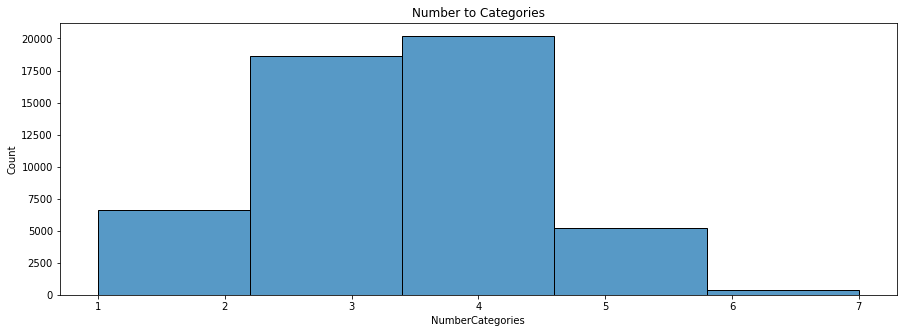

In [132]:
sns.histplot(data=DF.NumberCategories,bins=5)

# Set title
plt.title("Number to Categories")

# enlarge
plt.figure(1).set_size_inches(15, 5)

plt.show()

In [15]:

category = pd.DataFrame()
category['category'] = DF.columns[2:] 
category['count'] = DF.iloc[:,2:].sum().values

In [16]:
categoryHead = category.sort_values('count',ascending=False).head(15)

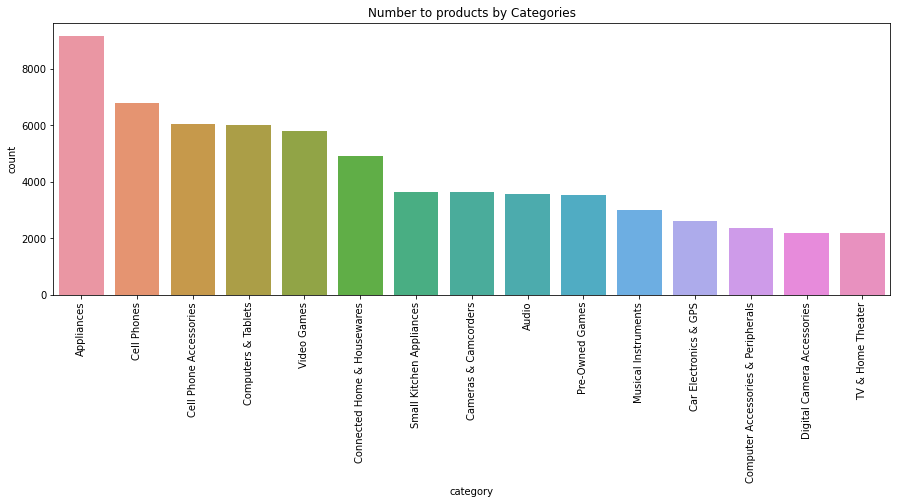

In [30]:
sns.barplot(data=categoryHead,x='category',y='count')

plt.xticks(rotation='vertical')

# Set title
plt.title("Number to products by Categories")

# enlarge
plt.figure(1).set_size_inches(15, 5)

plt.show()

# Data exploration

In [54]:
DF.Text = DF.Text.apply(text_normalizer.normalize)



In [55]:
DF.Text[20]

'metra speaker connector select volkswagen vehicle compatible select volkswagen vehicle connect speaker vehicle stereo easy installation'

In [ ]:
df.Text[20]

"Metra - Speaker Connector for Select Volkswagen VehiclesCompatible with select Volkswagen vehicles; connects a speaker to the vehicle's stereo; easy installation"

# Data Transformation

# Split Dataset

In [56]:
from sklearn.datasets import make_multilabel_classification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain

In [57]:
def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):
    """
    Train test split for multilabel classification. Uses the algorithm from: 
    'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.
    """
    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

In [58]:
DF

,Text,Connected Home & Housewares,Carfi Instore Only,Car Electronics & GPS,In-Store Only,Musical Instruments,"Toys, Games & Drones",Video Games,Cameras & Camcorders,Computers & Tablets,...,Novelty Telephones,General Appliance Accessories,Bluetooth/Hands-Free Car Kits,Refurbished Consoles,Music DVDs,All Sheet Music & Videos,Labels & Stickers,Mobile Broadband Devices with Plans,PS Vita Consoles,NumberCategories
0,duracell aaa battery pack compatible select el...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,duracell aa v coppertop battery pack long last...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,duracell aa battery pack compatible select ele...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,energizer max battery aa pack pack aa alkaline...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,duracell c battery pack compatible select elec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,honeywell true hepa replacement filter select ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
51642,dyson hard floor wipe dyson hard dc vacuum pac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51643,aleratec drive enclosure internal black x tota...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51644,amazon fire tv stick stream p content dual ban...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [59]:
X = DF['Text']
Y = DF.drop(columns=['Text','NumberCategories'])
X_train,X_test,Y_train,Y_test = multilabel_train_test_split(np.array(X), np.array(Y),test_size=0.2)

In [60]:
DF.to_csv('DataNew.csv')

In [223]:
DF = pd.read_csv('DataNew.csv',index_col=0)

In [224]:
DF

,Text,Connected Home & Housewares,Carfi Instore Only,Car Electronics & GPS,In-Store Only,Musical Instruments,"Toys, Games & Drones",Video Games,Cameras & Camcorders,Computers & Tablets,...,Novelty Telephones,General Appliance Accessories,Bluetooth/Hands-Free Car Kits,Refurbished Consoles,Music DVDs,All Sheet Music & Videos,Labels & Stickers,Mobile Broadband Devices with Plans,PS Vita Consoles,NumberCategories
0,duracell aaa battery pack compatible select el...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,duracell aa v coppertop battery pack long last...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,duracell aa battery pack compatible select ele...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,energizer max battery aa pack pack aa alkaline...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,duracell c battery pack compatible select elec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,honeywell true hepa replacement filter select ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
51642,dyson hard floor wipe dyson hard dc vacuum pac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51643,aleratec drive enclosure internal black x tota...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51644,amazon fire tv stick stream p content dual ban...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [5]:
DF['Text'][100]

'american audio radius midi controller black expand online assortment play mp wav cd cd r format medium card slot usb port powertouch digital scratch board effect'

In [4]:
DF

,Text,Connected Home & Housewares,Carfi Instore Only,Car Electronics & GPS,In-Store Only,Musical Instruments,"Toys, Games & Drones",Video Games,Cameras & Camcorders,Computers & Tablets,...,Novelty Telephones,General Appliance Accessories,Bluetooth/Hands-Free Car Kits,Refurbished Consoles,Music DVDs,All Sheet Music & Videos,Labels & Stickers,Mobile Broadband Devices with Plans,PS Vita Consoles,NumberCategories
0,duracell aaa battery pack compatible select el...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,duracell aa v coppertop battery pack long last...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,duracell aa battery pack compatible select ele...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,energizer max battery aa pack pack aa alkaline...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,duracell c battery pack compatible select elec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,honeywell true hepa replacement filter select ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
51642,dyson hard floor wipe dyson hard dc vacuum pac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51643,aleratec drive enclosure internal black x tota...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
51644,amazon fire tv stick stream p content dual ban...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


# Vectorized dataset

In [62]:
# Create vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Vectorizer X_train
X_train_values = tfidf_vectorizer.fit_transform(X_train)

# Vectorizer X_test
X_test_values = tfidf_vectorizer.transform(X_test)


In [63]:
joblib.dump(tfidf_vectorizer,'tfidf.plk')

['tfidf.plk']

# Models

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
import xgboost

### XGboost

In [176]:
modelXG = xgboost.XGBClassifier()
ModelXG = OneVsRestClassifier(modelXG)
ModelXG.fit(X_train_values, Y_train)


OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))

In [71]:
joblib.dump(ModelXG,'ModelXG.plk')

['ModelXG.plk']

In [72]:
pre = ModelXG.predict(X_test_values)

In [73]:
recall_score(pre,Y_test,average='micro')

0.9419587512678913

In [74]:
precision_score(pre,Y_test,average='micro')

0.860378135401297

In [75]:
f1_score(pre,Y_test,average='micro')

0.8993221190057745

### Logistic Regression

In [ ]:

model0 = LogisticRegression()

model = OneVsRestClassifier(model0)

model.fit(X_train_values, Y_train)


In [69]:
f1_score(model.predict(X_test_values),Y_test,average='micro')

0.8132397111769737

In [71]:
precision_score(model.predict(X_test_values),Y_test,average='micro')

0.7019435478332532

In [72]:
recall_score(model.predict(X_test_values),Y_test,average='micro')

0.9664791262824453

### Linear SVC

In [65]:
modelSVC = LinearSVC(random_state=42)


ModelSVC = OneVsRestClassifier(modelSVC)

ModelSVC.fit(X_train_values, Y_train)

OneVsRestClassifier(estimator=LinearSVC(random_state=42))

In [66]:
predic = ModelSVC.predict(X_test_values)

In [67]:
f1_score(predic,Y_test,average='micro')

0.9277774958128204

In [68]:
precision_score(predic,Y_test,average='micro')

0.9000492368291482

In [69]:
joblib.dump(ModelSVC,'ModeloSVC0.plk')


['ModeloSVC0.plk']

### Result

In [73]:
Y_train_columns = Y.columns

In [74]:
def modelFuction(text,tfidf_vectorizer):
    
    text = text_normalizer.normalize(text)

    m = joblib.load('ModeloSVC0.plk')

    print(tfidf_vectorizer.idf_.shape)
    text_vectorizer = tfidf_vectorizer.transform([text])
    print(tfidf_vectorizer.idf_.shape)
    prediction = m.predict(text_vectorizer)
    
    re = []
   
    for pre in np.where(prediction==1)[1]:
    
        re.append(Y_train_columns[pre])

    return  re

In [75]:
j = modelFuction("alfred play series guitar basic instructional dvd instructional dvd play guitar ideal beginner advanced student professional include lesson expert instructor",tfidf_vectorizer)

(212801,)
(212801,)


In [76]:
j

['Musical Instruments', 'Sheet Music & DVDs', 'Instrument Instructional DVDs']

In [47]:

DF = pd.read_csv('DataNew.csv',index_col=0)

Y_train_columns = DF.columns[2:]

In [62]:
DF.columns[13]

'Cameras & Camcorders'

In [57]:
def modelFuction1(text):
    
    text = text_normalizer.normalize(text)

    m = joblib.load('ModeloSVC0.plk')

    t = joblib.load('tfidf.plk')

    text_vectorizer = t.transform([text])
    
    prediction = m.predict(text_vectorizer)
    
    re = []
   
    for pre in np.where(prediction==1)[1]:
    
        re.append(Y_train_columns[pre])

    return prediction

In [ ]:
pred = modelFuction1()

In [ ]:
for pre in np.where(prediction==1)[1]:
    
        re.append(Y_train_columns[pre])

In [58]:
k = modelFuction1("Metra - Speaker Connector for Select Volkswagen VehiclesCompatible with select Volkswagen vehicles; connects a speaker to the vehicle's stereo; easy installation")

In [60]:
for pre in np.where(k==1)[1]:
    print(pre)
    
        #re.append(Y_train_columns[pre])

13
94
362


In [81]:
listColumns = []
for i in DF.drop(columns=['Text','NumberCategories']):
    listColumns.append(i)

In [83]:
len(listColumns)

859

In [67]:
m = joblib.load('ModeloSVC.plk')
f1_score(m.predict(X_test_values),Y_test,average='micro')

0.877573543402976

In [85]:
Y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)